# Current Position Monitoring

In [39]:
# Import necessary libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Analyze historical data to identify optimal stocks for swing trading.

In [40]:
# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    short_ema = df['Adj Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = df['Adj Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Function to get the last business day if today is not a business day
def get_last_business_day():
    today = pd.Timestamp(datetime.today().date())
    if today.isoweekday() > 5:  # If it's a weekend (Saturday or Sunday)
        today = today - pd.offsets.BDay()  # Shift to the previous business day
    return today.strftime('%Y-%m-%d')  # Return as a date string



In [41]:
get_last_business_day()

'2024-12-13'

In [42]:

def final_vis(stock, rsi_low, start_date):
    # Fetch data for TSLA
    df = yf.download(stock, start_date, end=get_last_business_day())
    
    # Calculate RSI and MACD
    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal'] = calculate_macd(df)
    
    # Calculate 3-day rolling average of RSI
    df['RSI_3D_Avg'] = df['RSI'].rolling(window=3).mean()
    
    # Drop rows with NaN values resulting from indicator calculations
    df = df.dropna()

    # Initialize buy and sell signals lists
    buy_signals = [np.nan] * len(df)
    sell_signals = [np.nan] * len(df)

    # Loop through the DataFrame to find joint buy and sell signals
    for i in range(1, len(df)):
        # Buy Signal: RSI rolling average <= rsi_low and MACD Golden Cross (MACD crosses above Signal)
        if df['RSI_3D_Avg'].iloc[i] <= rsi_low and df['MACD'].iloc[i] > df['Signal'].iloc[i] and df['MACD'].iloc[i - 1] <= df['Signal'].iloc[i - 1]:
            buy_signals[i] = df['Adj Close'].iloc[i]
    
        # Sell Signal: RSI rolling average >= 70 and MACD Dead Cross (MACD crosses below Signal)
        elif df['RSI_3D_Avg'].iloc[i] >= 70 and df['MACD'].iloc[i] < df['Signal'].iloc[i] and df['MACD'].iloc[i - 1] >= df['Signal'].iloc[i - 1]:
            sell_signals[i] = df['Adj Close'].iloc[i]

    # Add buy and sell signals to the DataFrame
    df = df.copy()
    df.loc[:, 'Buy'] = buy_signals
    df.loc[:, 'Sell'] = sell_signals

    # Plot stock price, volume, RSI, MACD, and Buy/Sell points
    plt.figure(figsize=(14, 3))

    # Plot Adjusted Close price and Buy/Sell signals
#     plt.subplot(4, 1, 1)
    plt.plot(df['Adj Close'], label='Adjusted Close Price', color='cornflowerblue', alpha=0.7)
    plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
    plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
    plt.title(f'{stock} Adjusted Close Price with Buy/Sell Signals')
    plt.legend()

#     # Plot Volume
#     plt.subplot(4, 1, 2)
#     plt.bar(df.index, df['Volume'], label='Volume', color='gray', alpha=0.6)
#     plt.title(f'{stock} Volume')
#     plt.legend()

#     # Plot RSI
#     plt.subplot(4, 1, 3)
#     plt.plot(df['RSI'], label='RSI', color='purple', alpha=0.7)
#     plt.axhline(30, linestyle='--', alpha=0.5, color='green')
#     plt.axhline(70, linestyle='--', alpha=0.5, color='red')
#     plt.title(f'{stock} RSI')
#     plt.legend()

#     # Plot MACD and Signal line
#     plt.subplot(4, 1, 4)
#     plt.plot(df['MACD'], label='MACD', color='blue', alpha=0.7)
#     plt.plot(df['Signal'], label='Signal Line', color='orange', alpha=0.7)
#     plt.fill_between(df.index, df['MACD'] - df['Signal'], 0, alpha=0.3, label='MACD Histogram')
#     plt.title(f'{stock} MACD')
#     plt.legend()

#     plt.tight_layout()
    plt.show()

In [43]:
stock_list = ['MSFT', 'NVDA', 'GOOG', 'AAPL', 'TSLA', 'BRK-B', 'AVGO', 'XOM', 'JNJ', \
              'QCOM', 'NOW', 'V', 'CVX', 'VZ', 'SPY', 'QQQE', 'CAT', 'LMT', 'IVV', 'SCHH', \
              'FREL', 'META', 'COIN']

In [44]:
stock_list.sort()

In [47]:
print(stock_list)

['AAPL', 'AVGO', 'BRK-B', 'CAT', 'COIN', 'CVX', 'FREL', 'GOOG', 'IVV', 'JNJ', 'LMT', 'META', 'MSFT', 'NOW', 'NVDA', 'QCOM', 'QQQE', 'SCHH', 'SPY', 'TSLA', 'V', 'VZ', 'XOM']


[*********************100%***********************]  1 of 1 completed


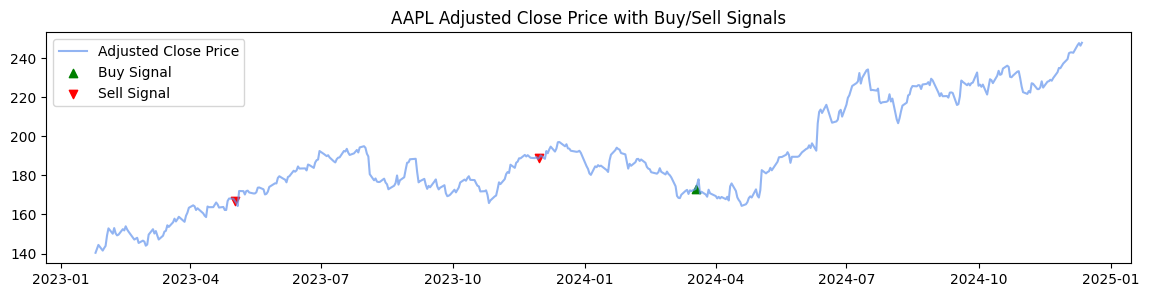

[*********************100%***********************]  1 of 1 completed


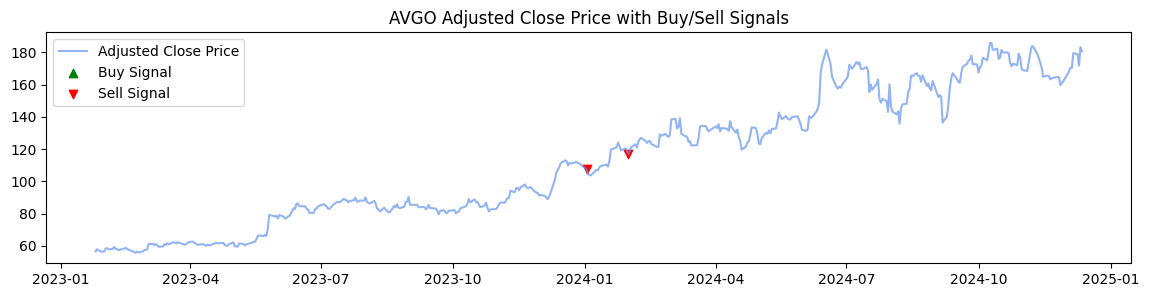

[*********************100%***********************]  1 of 1 completed


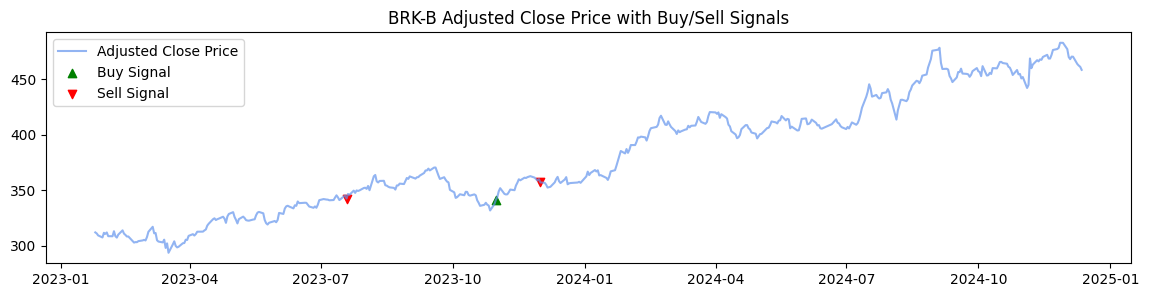

[*********************100%***********************]  1 of 1 completed


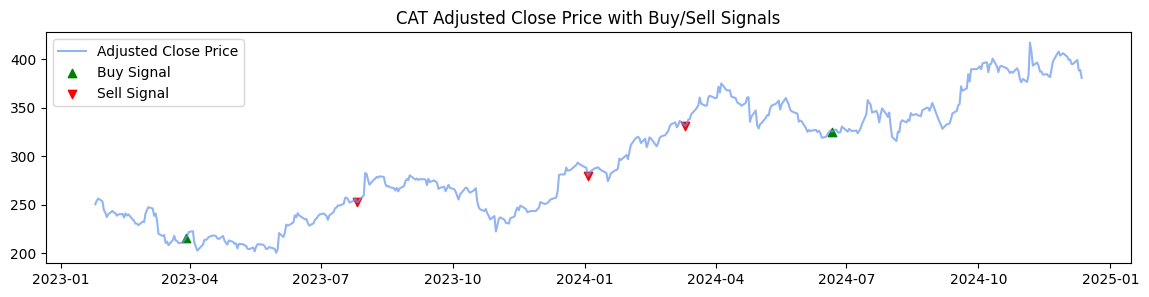

[*********************100%***********************]  1 of 1 completed


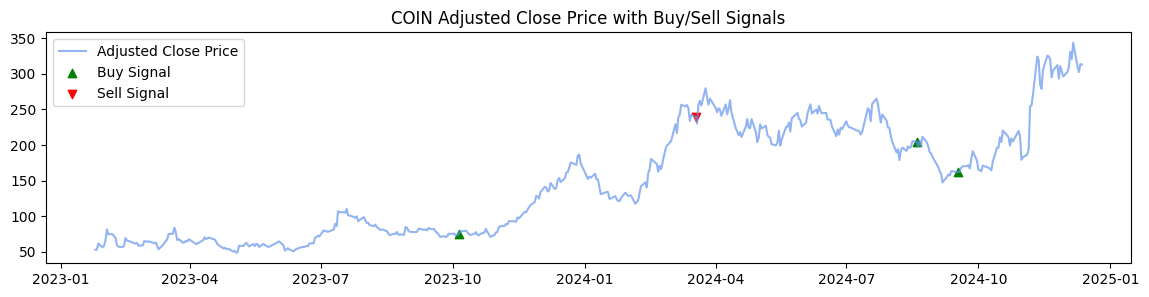

[*********************100%***********************]  1 of 1 completed


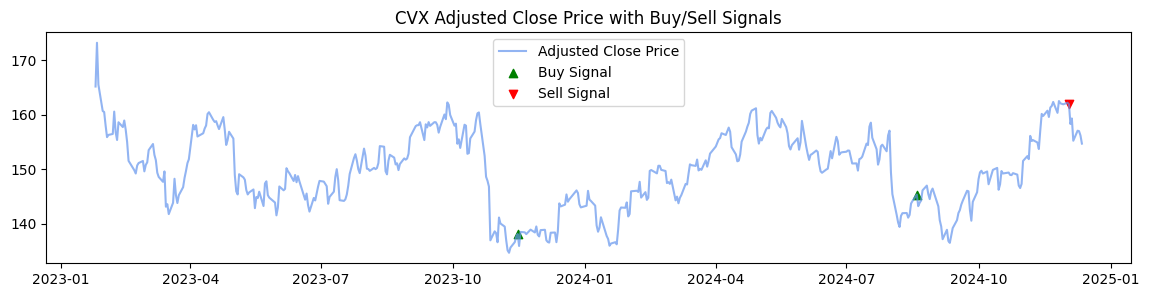

[*********************100%***********************]  1 of 1 completed


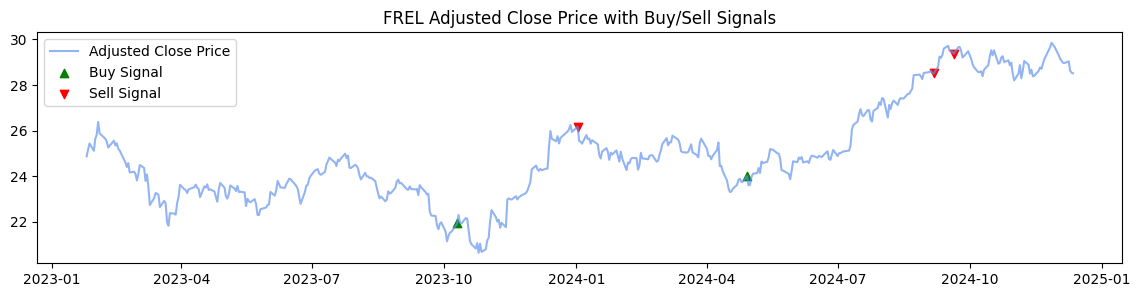

[*********************100%***********************]  1 of 1 completed


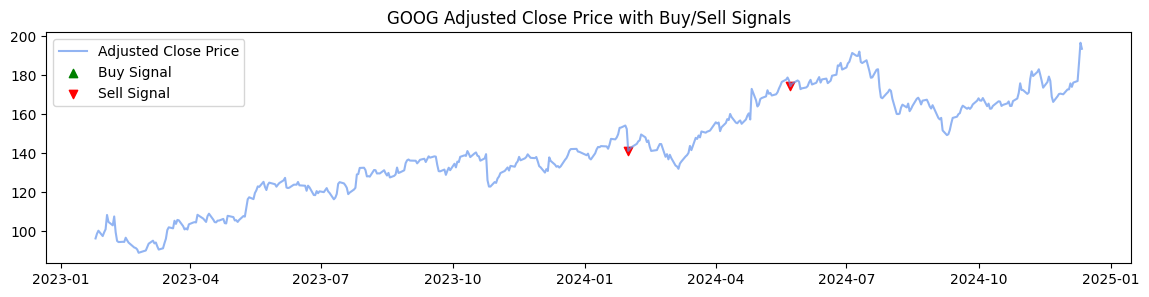

[*********************100%***********************]  1 of 1 completed


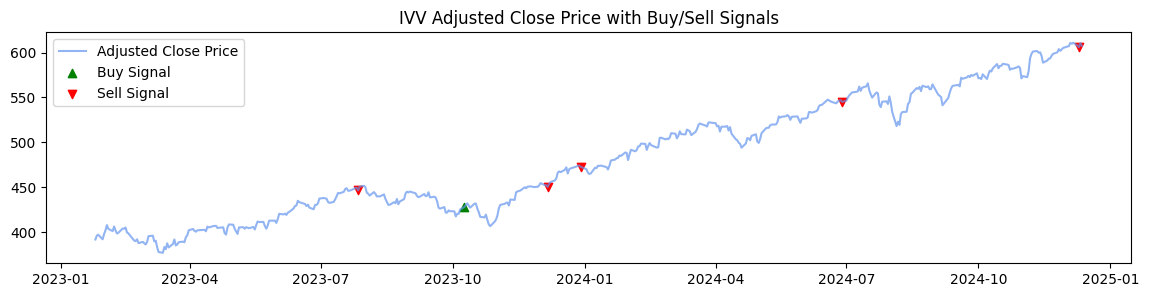

[*********************100%***********************]  1 of 1 completed


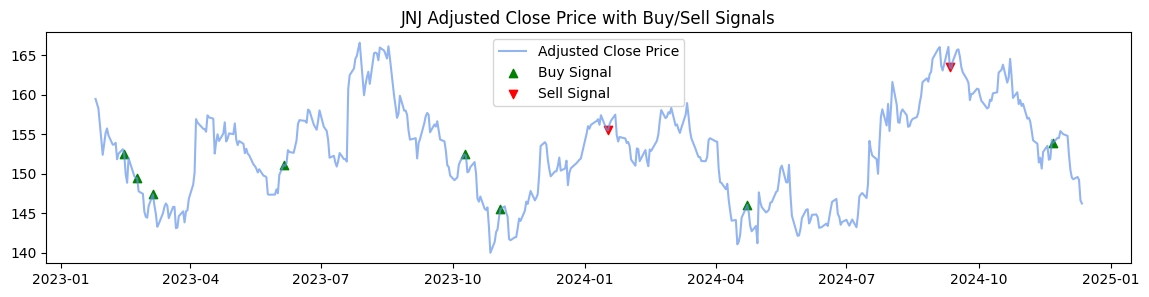

[*********************100%***********************]  1 of 1 completed


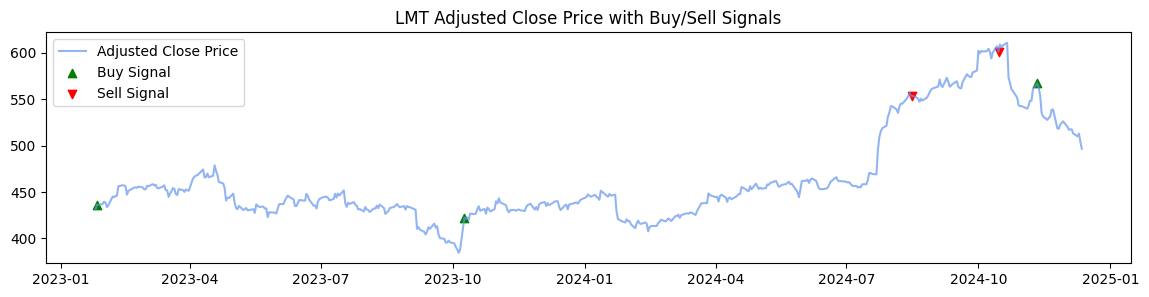

[*********************100%***********************]  1 of 1 completed


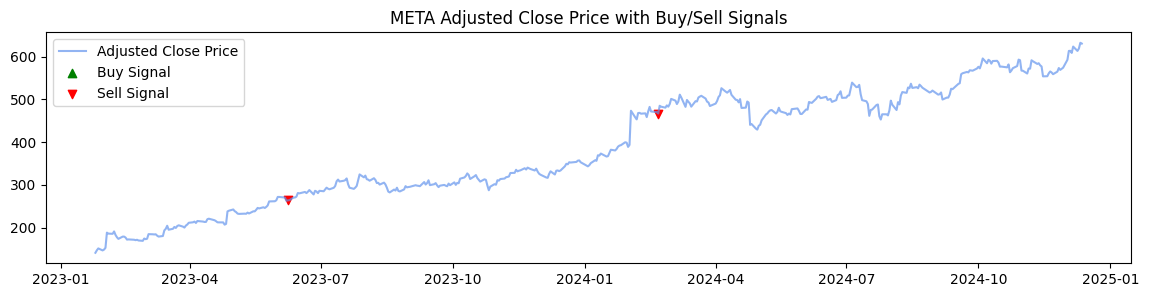

[*********************100%***********************]  1 of 1 completed


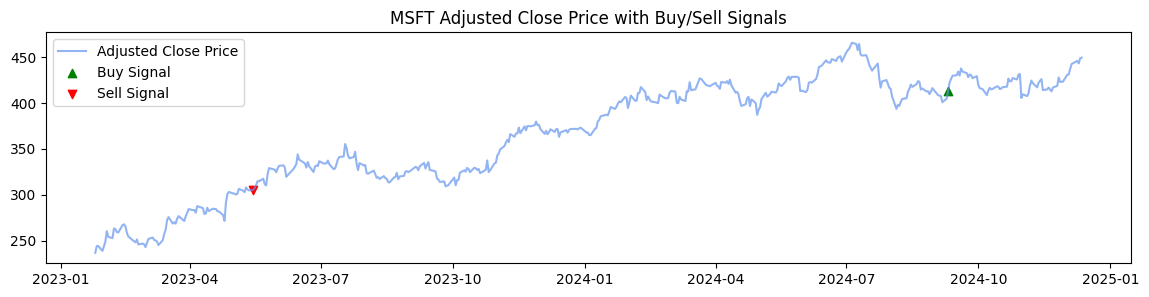

[*********************100%***********************]  1 of 1 completed


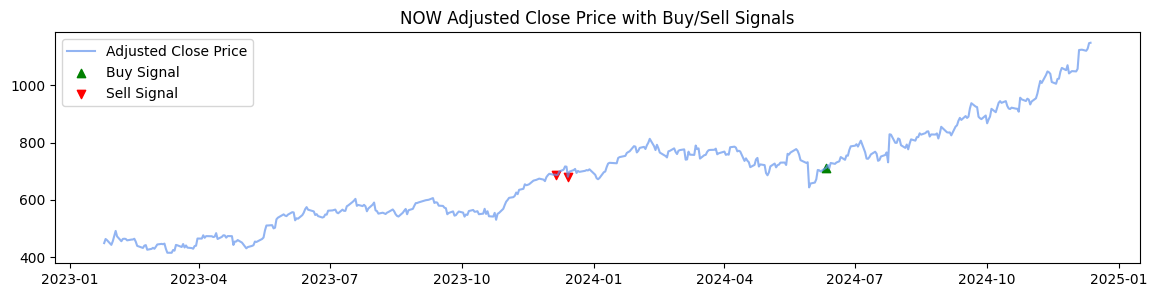

[*********************100%***********************]  1 of 1 completed


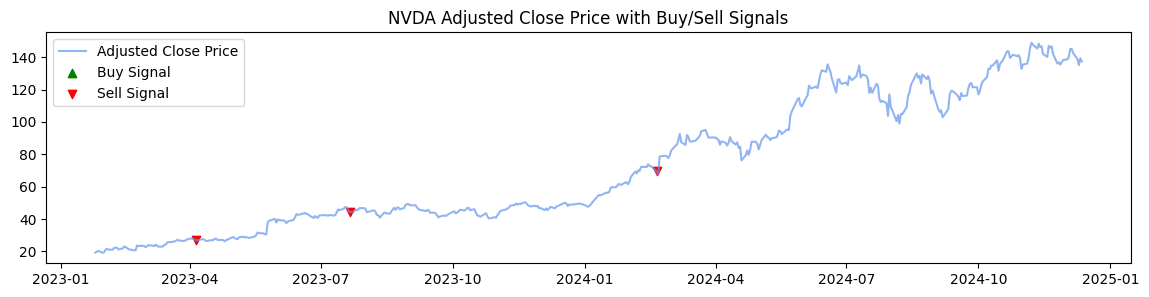

[*********************100%***********************]  1 of 1 completed


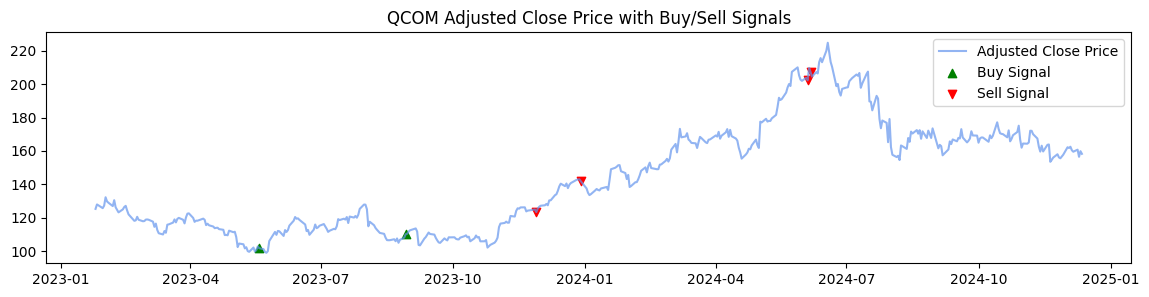

[*********************100%***********************]  1 of 1 completed


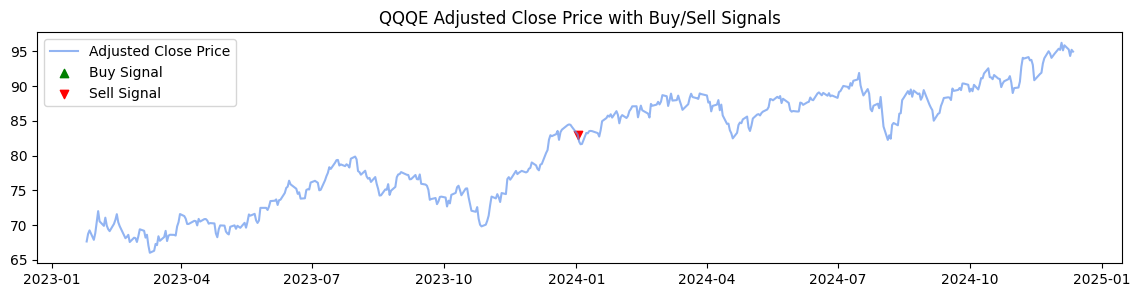

[*********************100%***********************]  1 of 1 completed


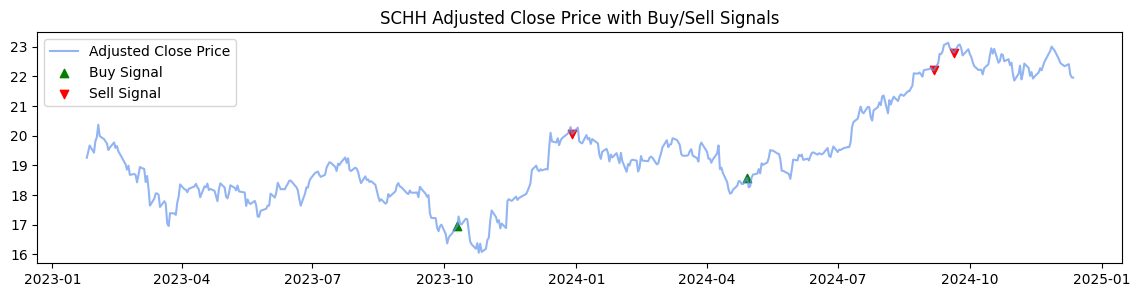

[*********************100%***********************]  1 of 1 completed


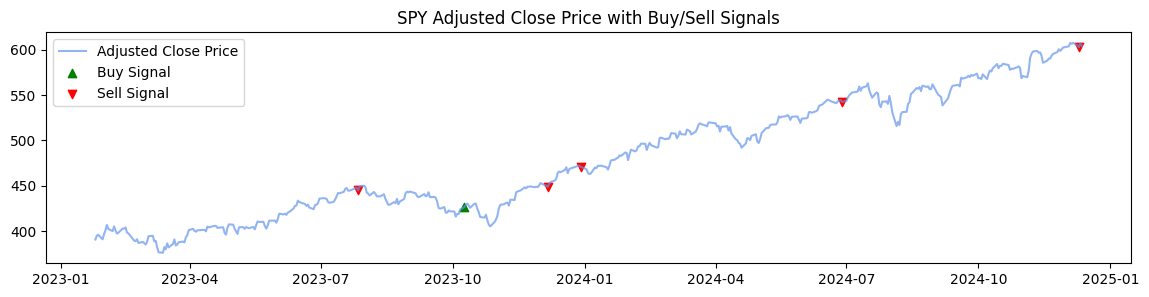

[*********************100%***********************]  1 of 1 completed


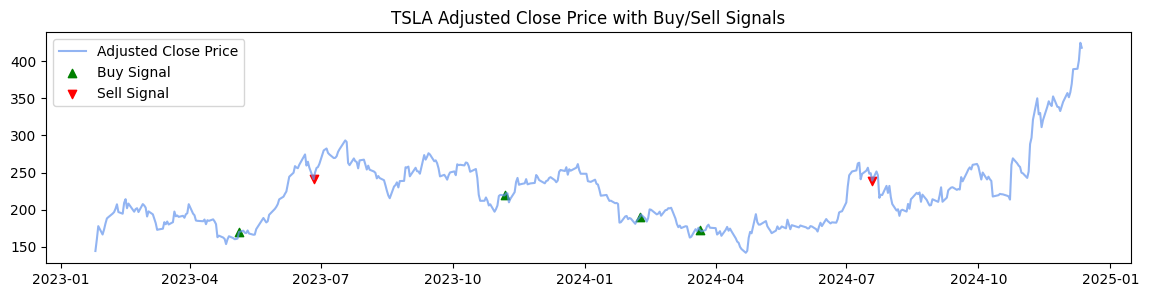

[*********************100%***********************]  1 of 1 completed


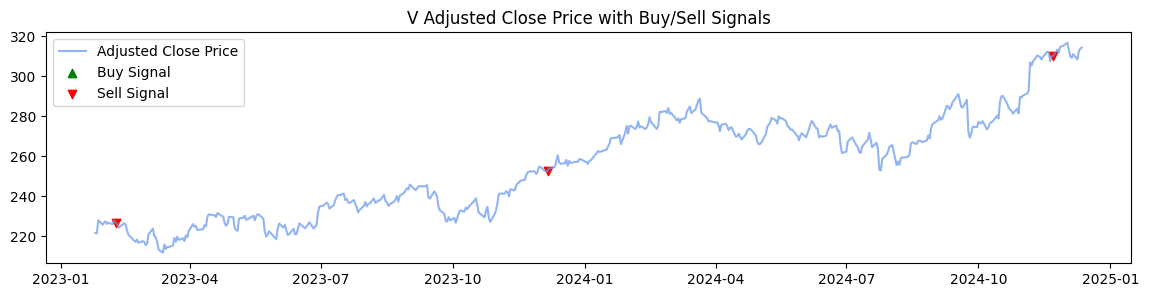

[*********************100%***********************]  1 of 1 completed


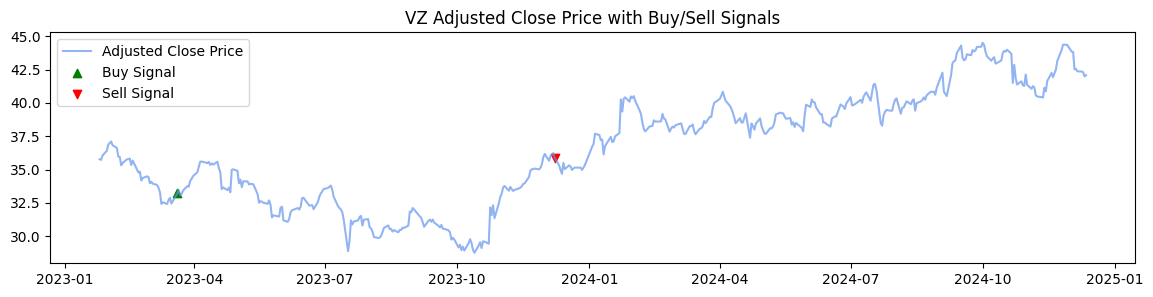

[*********************100%***********************]  1 of 1 completed


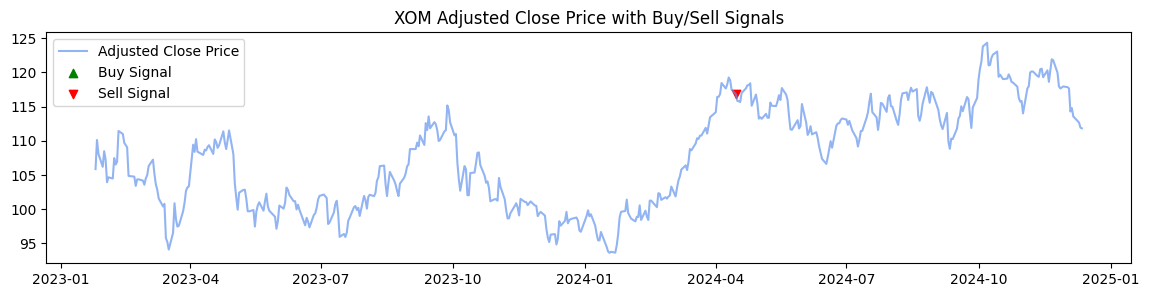

In [46]:
for stock in stock_list:
    final_vis(stock, rsi_low = 35, start_date = '2023-01-01')

In [34]:
crypto_symbols = [
    "BTC-USD",  # Bitcoin
    "ETH-USD",  # Ethereum
#     "ETC-USD"   # Ethereum Classic
#     "BNB-USD",  # Binance Coin
#     "XRP-USD",  # XRP
#     "ADA-USD",  # Cardano
#     "SOL-USD",  # Solana
    "DOGE-USD", # Dogecoin
    "DOT-USD",  # Polkadot
#     "MATIC-USD",# Polygon
#     "SHIB-USD", # Shiba Inu
#     "LTC-USD",  # Litecoin
#     "AVAX-USD", # Avalanche
#     "TRX-USD",  # TRON
#     "XMR-USD",  # Monero
#     "BCH-USD",  # Bitcoin Cash
#     "XLM-USD",  # Stellar
#     "ATOM-USD", # Cosmos
]

In [35]:
crypto_symbols.sort()

In [36]:
crypto_symbols

['BTC-USD', 'DOGE-USD', 'DOT-USD', 'ETH-USD']

In [8]:
# import yfinance as yf

# # Fetch data for Bitcoin
# crypto = yf.Ticker("DOT-USD")
# crypto_info = crypto.info
# print(crypto_info)
# print(f"Crypto Name: {crypto_info['name']}")


[*********************100%***********************]  1 of 1 completed


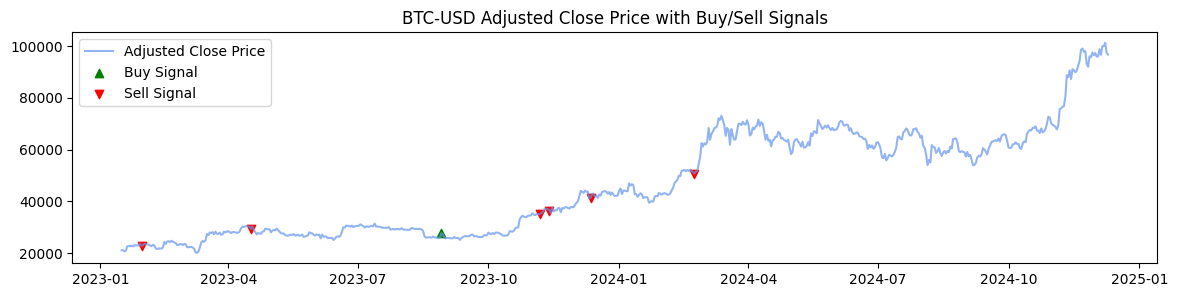

[*********************100%***********************]  1 of 1 completed


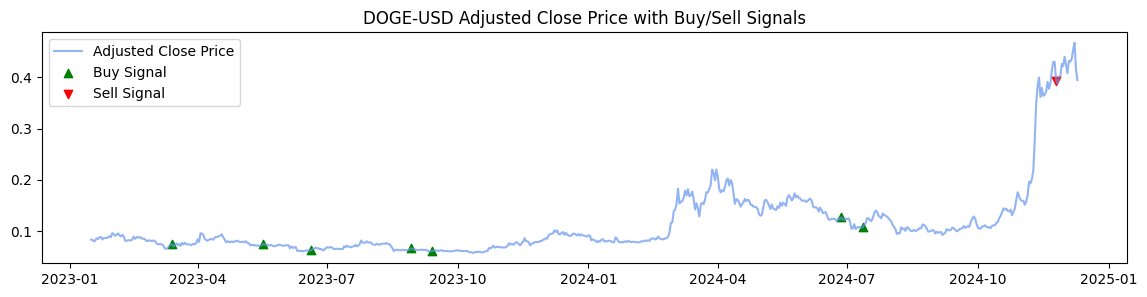

[*********************100%***********************]  1 of 1 completed


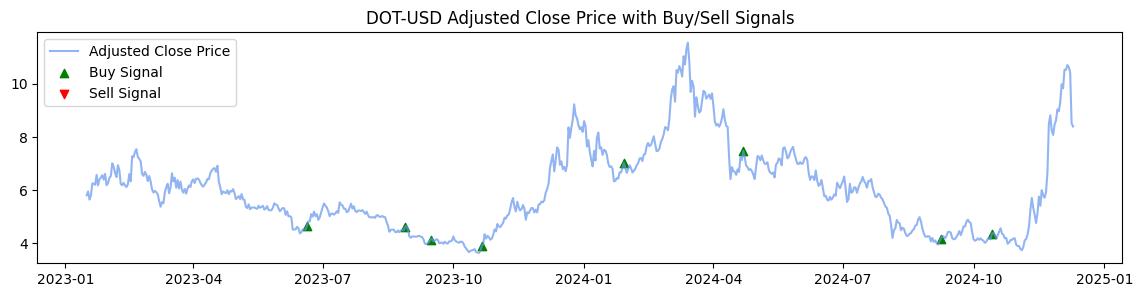

[*********************100%***********************]  1 of 1 completed


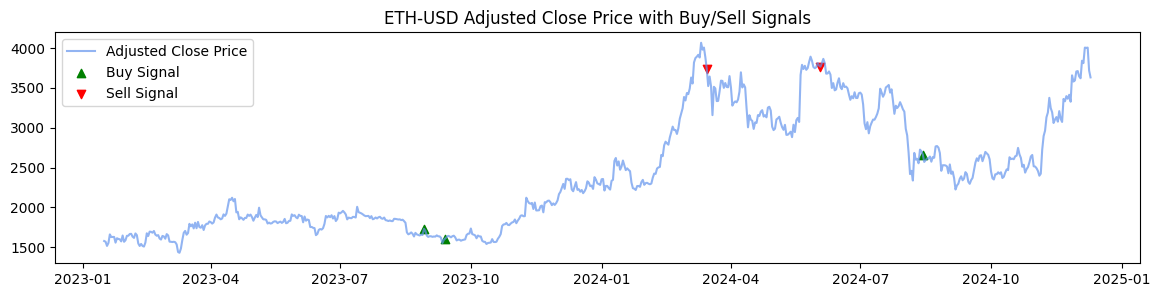

In [38]:
for stock in crypto_symbols:
    final_vis(stock, rsi_low = 35, start_date = '2023-01-01')